In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
club_info = pd.read_csv("kbo_club_info.csv")

In [3]:
club_info = club_info[['clubid','clubname','founded_year','hometown','stadium']]
club_info

,clubid,clubname,founded_year,hometown,stadium
0,SL01,SSG Landers,2000,Incheon,SSG Landers Field
1,DB02,Doosan Bears,1982,Seoul,Jamsil Baseball Stadium
2,LT03,LG Twins,1982,Seoul,Jamsil Baseball Stadium
3,KH04,Kiwoom Heroes,2008,Seoul,Gochuck Dome
4,KW05,KT Wiz,2015,Suwon,KT Wiz Park
5,KT06,Kia Tigers,1982,Gwangju,Gwangju Kia Champions Field
6,SL07,Samsung Lions,1982,Daegu,Daegu Samsung Lions Park
7,LG08,Lotte Giants,1982,Busan,Sajik Baseball Stadium
8,ND09,NC Dinos,2011,Changwon,Changwon NC Park
9,HE10,Hanwha Eagles,1985,Daejeon,Hanwha Eagles Park


## Correlation between League Standing and Attendance Ranking

In [4]:
attendance_avg = pd.read_csv("attendance_avg.csv")
club_ranking = pd.read_csv("club_ranking.csv")

In [5]:
attendance_avg = attendance_avg[0:23].set_index("year").transpose().reset_index()
attendance_avg = attendance_avg[0:10]
attendance_avg = attendance_avg.rename(columns={"index": "clubid"})
attendance_avg

year,clubid,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,SL07,"9,367","3,864",386,"9,607","10,449","9,790","11,825","7,291","7,891",...,"5,782","6,147","5,348","3,933","5,720","2,923","5,405","3,697","6,343","6,021"
1,KT06,"8,394","1,458",294,"9,613","11,968","14,234","10,743","9,863","10,366",...,"8,818","5,838","3,289","3,240","2,638","2,362","3,972","3,514","4,246","1,049"
2,LG08,"8,773","1,921",510,"9,433","12,523","14,424","11,842","11,124","12,982",...,"20,597","21,901","12,056","7,002","10,357","4,590","2,284","1,910","6,069","6,733"
3,LT03,"12,919","1,621",574,"13,894","15,398","15,762","16,078","14,630","18,241",...,"14,778","12,804","14,304","11,407","11,982","9,407","11,147","9,665","10,554","10,684"
4,DB02,"8,953","1,362",765,"13,659","15,445","15,206","16,181","15,560","17,630",...,"15,731","14,756","12,477","11,530","9,789","6,817","6,451","7,001","9,395","7,625"
5,HE10,"4,975","1,444",277,"7,711","10,196","8,240","9,173","9,130","7,424",...,"5,691","5,920","5,120","3,884","3,466","1,916","2,466","2,368","3,536","2,318"
6,SL01,"13,633","1,645",425,"13,652","14,406","12,396","12,017","11,310","12,966",...,"12,556","11,972","10,419","5,256","7,272","5,116","6,552","6,102","2,666","1,281"
7,KH04,"4,858",936,377,"6,304","6,314","9,714","10,863","7,094","6,921",...,"4,996","4,096",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ND09,"5,125","1,782",639,"9,865","6,151","7,377","7,627","7,259","7,297",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,KW05,"7,393","1,030",312,"7,455","9,286","9,535","9,478","8,964",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create avg_attendance_rank table including 2015-2022 seasons

In [6]:
attendance_avg["2022_rank"] = attendance_avg[2022].rank(method = "dense", ascending = False)
attendance_avg["2021_rank"] = attendance_avg[2021].rank(method = "dense", ascending = False)
attendance_avg["2020_rank"] = attendance_avg[2020].rank(method = "dense", ascending = False)
attendance_avg["2019_rank"] = attendance_avg[2019].rank(method = "dense", ascending = False)
attendance_avg["2018_rank"] = attendance_avg[2018].rank(method = "dense", ascending = False)
attendance_avg["2017_rank"] = attendance_avg[2017].rank(method = "dense", ascending = False)
attendance_avg["2016_rank"] = attendance_avg[2016].rank(method = "dense", ascending = False)
attendance_avg["2015_rank"] = attendance_avg[2015].rank(method = "dense", ascending = False)

In [7]:
attendance_avg_rank = attendance_avg[["clubid","2022_rank", "2021_rank","2020_rank","2019_rank","2018_rank","2017_rank","2016_rank","2015_rank"]]
attendance_avg_rank

year,clubid,2022_rank,2021_rank,2020_rank,2019_rank,2018_rank,2017_rank,2016_rank,2015_rank
0,SL07,1.0,2.0,6.0,3.0,9.0,1.0,8.0,4.0
1,KT06,4.0,7.0,9.0,2.0,8.0,9.0,10.0,1.0
2,LG08,3.0,3.0,4.0,4.0,7.0,8.0,7.0,10.0
3,LT03,10.0,6.0,3.0,8.0,5.0,6.0,5.0,8.0
4,DB02,2.0,9.0,1.0,9.0,4.0,7.0,4.0,7.0
5,HE10,7.0,8.0,10.0,5.0,10.0,4.0,2.0,2.0
6,SL01,9.0,5.0,5.0,10.0,6.0,10.0,6.0,9.0
7,KH04,8.0,1.0,7.0,7.0,2.0,2.0,9.0,6.0
8,ND09,6.0,4.0,2.0,1.0,3.0,5.0,3.0,5.0
9,KW05,5.0,10.0,8.0,6.0,1.0,3.0,1.0,3.0


### Merge league ranking info with attendance ranking

In [8]:
club_ranking_2022 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2022]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2022, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2022_final_ranking"})
club_ranking_2021 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2021]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2021, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2021_final_ranking"})
club_ranking_2020 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2020]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2020, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2020_final_ranking"})
club_ranking_2019 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2019]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2019, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2019_final_ranking"})
club_ranking_2018 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2018]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2018, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2018_final_ranking"})
club_ranking_2017 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2017]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2017, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2017_final_ranking"})
club_ranking_2016 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2016]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2016, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2016_final_ranking"})
club_ranking_2015 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2015]
attendance_avg_rank = pd.merge(attendance_avg_rank, club_ranking_2015, on = "clubid")
attendance_avg_rank = attendance_avg_rank.rename(columns={"final_ranking": "2015_final_ranking"})
attendance_avg_rank

,clubid,2022_rank,2021_rank,2020_rank,2019_rank,2018_rank,2017_rank,2016_rank,2015_rank,2022_final_ranking,2021_final_ranking,2020_final_ranking,2019_final_ranking,2018_final_ranking,2017_final_ranking,2016_final_ranking,2015_final_ranking
0,SL07,1.0,2.0,6.0,3.0,9.0,1.0,8.0,4.0,7,3,8,8,6,9,9,2
1,KT06,4.0,7.0,9.0,2.0,8.0,9.0,10.0,1.0,5,9,6,7,5,1,5,7
2,LG08,3.0,3.0,4.0,4.0,7.0,8.0,7.0,10.0,8,8,7,10,7,3,8,8
3,LT03,10.0,6.0,3.0,8.0,5.0,6.0,5.0,8.0,3,4,4,4,8,6,4,9
4,DB02,2.0,9.0,1.0,9.0,4.0,7.0,4.0,7.0,9,2,2,1,2,2,1,1
5,HE10,7.0,8.0,10.0,5.0,10.0,4.0,2.0,2.0,10,10,10,9,3,8,7,6
6,SL01,9.0,5.0,5.0,10.0,6.0,10.0,6.0,9.0,1,6,9,3,1,5,6,5
7,KH04,8.0,1.0,7.0,7.0,2.0,2.0,9.0,6.0,2,5,5,2,4,7,3,4
8,ND09,6.0,4.0,2.0,1.0,3.0,5.0,3.0,5.0,6,7,1,5,10,4,2,3
9,KW05,5.0,10.0,8.0,6.0,1.0,3.0,1.0,3.0,4,1,3,6,9,10,10,10


### Correlations between League Standing and Attendance Ranking, 2015-2022

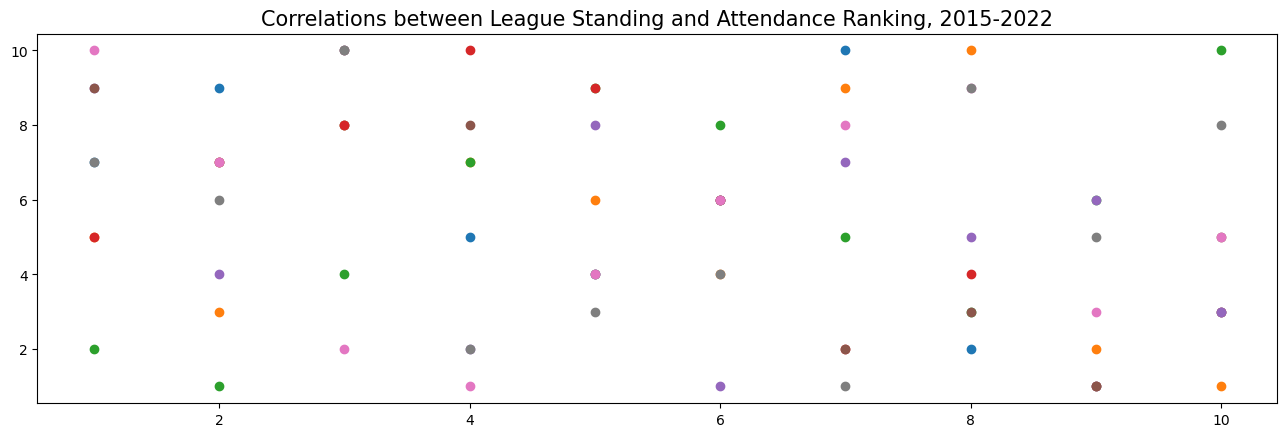

In [9]:
plt.figure().set_figwidth(16)


plt.scatter(attendance_avg_rank['2022_rank'],attendance_avg_rank['2022_final_ranking'])
plt.scatter(attendance_avg_rank['2021_rank'],attendance_avg_rank['2021_final_ranking'])
plt.scatter(attendance_avg_rank['2020_rank'],attendance_avg_rank['2020_final_ranking'])
plt.scatter(attendance_avg_rank['2019_rank'],attendance_avg_rank['2019_final_ranking'])
plt.scatter(attendance_avg_rank['2018_rank'],attendance_avg_rank['2018_final_ranking'])
plt.scatter(attendance_avg_rank['2017_rank'],attendance_avg_rank['2017_final_ranking'])
plt.scatter(attendance_avg_rank['2016_rank'],attendance_avg_rank['2016_final_ranking'])
plt.scatter(attendance_avg_rank['2015_rank'],attendance_avg_rank['2015_final_ranking'])

plt.title("Correlations between League Standing and Attendance Ranking, 2015-2022", fontsize = 15)
plt.show()

### Difference Trend between League Standing and Attendance Ranking, 2015-2022

In [10]:
attendance_avg_rank['2022_diff'] = abs(attendance_avg_rank['2022_rank'] - attendance_avg_rank['2022_final_ranking'])
attendance_avg_rank['2021_diff'] = abs(attendance_avg_rank['2021_rank'] - attendance_avg_rank['2021_final_ranking'])
attendance_avg_rank['2020_diff'] = abs(attendance_avg_rank['2020_rank'] - attendance_avg_rank['2020_final_ranking'])
attendance_avg_rank['2019_diff'] = abs(attendance_avg_rank['2019_rank'] - attendance_avg_rank['2019_final_ranking'])
attendance_avg_rank['2018_diff'] = abs(attendance_avg_rank['2018_rank'] - attendance_avg_rank['2018_final_ranking'])
attendance_avg_rank['2017_diff'] = abs(attendance_avg_rank['2017_rank'] - attendance_avg_rank['2017_final_ranking'])
attendance_avg_rank['2016_diff'] = abs(attendance_avg_rank['2016_rank'] - attendance_avg_rank['2016_final_ranking'])
attendance_avg_rank['2015_diff'] = abs(attendance_avg_rank['2015_rank'] - attendance_avg_rank['2015_final_ranking'])

In [11]:
rank_diff = attendance_avg_rank[['clubid','2015_diff','2016_diff','2017_diff','2018_diff','2019_diff','2020_diff','2021_diff','2022_diff']]

In [12]:
rank_diff_transposed = rank_diff.set_index('clubid').transpose()
rank_diff_transposed

clubid,SL07,KT06,LG08,LT03,DB02,HE10,SL01,KH04,ND09,KW05
2015_diff,2.0,6.0,2.0,1.0,6.0,4.0,4.0,2.0,2.0,7.0
2016_diff,1.0,5.0,1.0,1.0,3.0,5.0,0.0,6.0,1.0,9.0
2017_diff,8.0,8.0,5.0,0.0,5.0,4.0,5.0,5.0,1.0,7.0
2018_diff,3.0,3.0,0.0,3.0,2.0,7.0,5.0,2.0,7.0,8.0
2019_diff,5.0,5.0,6.0,4.0,8.0,4.0,7.0,5.0,4.0,0.0
2020_diff,2.0,3.0,3.0,1.0,1.0,0.0,4.0,2.0,1.0,5.0
2021_diff,1.0,2.0,5.0,2.0,7.0,2.0,1.0,4.0,3.0,9.0
2022_diff,6.0,1.0,5.0,7.0,7.0,3.0,8.0,6.0,0.0,1.0


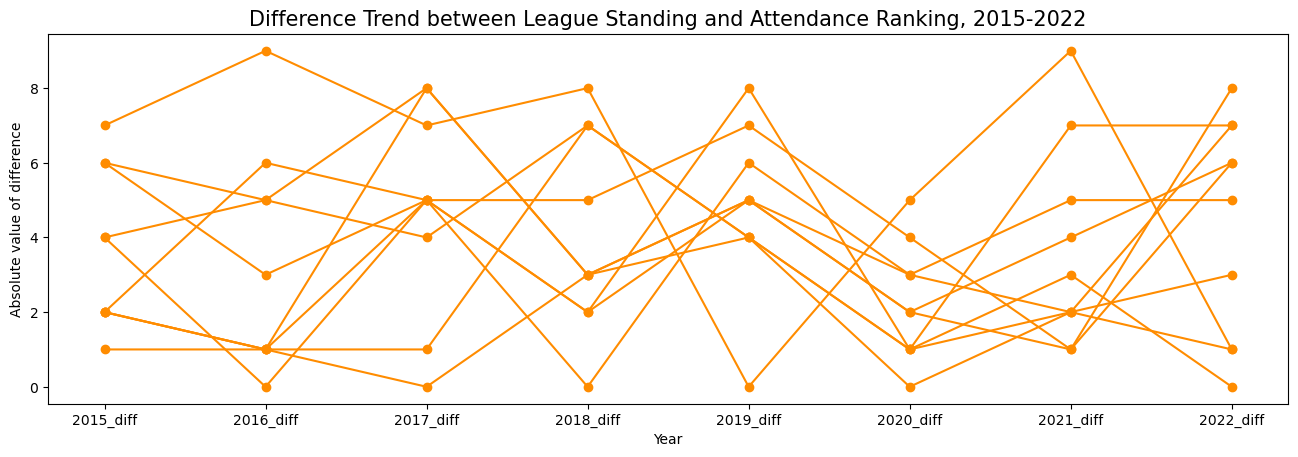

In [13]:
plt.figure().set_figwidth(16)
plt.plot(rank_diff_transposed, color = "darkorange", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Absolute value of difference")
plt.title("Difference Trend between League Standing and Attendance Ranking, 2015-2022", fontsize = 15)

# Display
plt.show()

In [14]:
rank_diff.corr().style.background_gradient(cmap='coolwarm')

/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/1143106303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rank_diff.corr().style.background_gradient(cmap='coolwarm')


,2015_diff,2016_diff,2017_diff,2018_diff,2019_diff,2020_diff,2021_diff,2022_diff
2015_diff,1.000000,0.621524,0.556327,0.339674,-0.165871,0.433304,0.537176,-0.331192
2016_diff,0.621524,1.000000,0.404258,0.360424,-0.626574,0.283335,0.591293,-0.477937
2017_diff,0.556327,0.404258,1.000000,-0.127399,-0.007777,0.550395,0.159378,-0.088944
2018_diff,0.339674,0.360424,-0.127399,1.000000,-0.649788,0.081978,0.079128,-0.566659
2019_diff,-0.165871,-0.626574,-0.007777,-0.649788,1.000000,-0.286896,-0.324578,0.635023
2020_diff,0.433304,0.283335,0.550395,0.081978,-0.286896,1.000000,0.343194,-0.093543
2021_diff,0.537176,0.591293,0.159378,0.079128,-0.324578,0.343194,1.000000,-0.219549
2022_diff,-0.331192,-0.477937,-0.088944,-0.566659,0.635023,-0.093543,-0.219549,1.000000


## Correlation between League Standing and Attendance Rate, 2022

In [15]:
club_attendance = pd.read_csv("club_attendance.csv")

In [16]:
club_attendance

,city,city_population,stadium_name,hometeam,hometeam_id,capacity,avg_attendance_2022,total_attendance_2022
0,Incheon,2849000,SSG Landers Field,SSG Landers,SL01,23000,13633,981546
1,Seoul,9988000,Jamsil Baseball Stadium,Doosan Bears,DB02,25000,8953,644614
2,Seoul,9988000,Jamsil Baseball Stadium,LG Twins,LT03,25000,8773,930163
3,Seoul,9988000,Gochuck Dome,Kiwoom Heroes,KH04,16744,4858,349773
4,Suwon,1365000,KT Wiz Park,KT Wiz,KW05,20000,7393,532268
5,Gwangju,1529000,Gwangju Kia Champions Field,Kia Tigers,KT06,20500,8394,604394
6,Daegu,2181000,Daegu Samsung Lions Park,Samsung Lions,SL07,24000,9367,674452
7,Busan,3357737,Sajik Baseball Stadium,Lotte Giants,LG08,24500,8773,631656
8,Changwon,1054000,Changwon NC Park,NC Dinos,ND09,22112,5125,369018
9,Daejeon,1577000,Hanwha Eagles Park,Hanwha Eagles,HE10,13000,4975,358190


In [17]:
club_attendance['attendance_rate_2022'] = round(club_attendance['avg_attendance_2022'] / club_attendance['capacity'],2) * 100
club_attendance['attendance_rate_2022_rank'] = club_attendance['attendance_rate_2022'].rank(method= "dense", ascending = False)
club_attendance

,city,city_population,stadium_name,hometeam,hometeam_id,capacity,avg_attendance_2022,total_attendance_2022,attendance_rate_2022,attendance_rate_2022_rank
0,Incheon,2849000,SSG Landers Field,SSG Landers,SL01,23000,13633,981546,59.0,1.0
1,Seoul,9988000,Jamsil Baseball Stadium,Doosan Bears,DB02,25000,8953,644614,36.0,6.0
2,Seoul,9988000,Jamsil Baseball Stadium,LG Twins,LT03,25000,8773,930163,35.0,7.0
3,Seoul,9988000,Gochuck Dome,Kiwoom Heroes,KH04,16744,4858,349773,29.0,8.0
4,Suwon,1365000,KT Wiz Park,KT Wiz,KW05,20000,7393,532268,37.0,5.0
5,Gwangju,1529000,Gwangju Kia Champions Field,Kia Tigers,KT06,20500,8394,604394,41.0,2.0
6,Daegu,2181000,Daegu Samsung Lions Park,Samsung Lions,SL07,24000,9367,674452,39.0,3.0
7,Busan,3357737,Sajik Baseball Stadium,Lotte Giants,LG08,24500,8773,631656,36.0,6.0
8,Changwon,1054000,Changwon NC Park,NC Dinos,ND09,22112,5125,369018,23.0,9.0
9,Daejeon,1577000,Hanwha Eagles Park,Hanwha Eagles,HE10,13000,4975,358190,38.0,4.0


In [18]:
club_ranking_2022 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2022]
club_ranking_2022 = club_ranking_2022.rename(columns={"clubid": "hometeam_id"})

In [19]:
club_attendance_merged = pd.merge(club_attendance, club_ranking_2022, on="hometeam_id")
club_attendance_merged

,city,city_population,stadium_name,hometeam,hometeam_id,capacity,avg_attendance_2022,total_attendance_2022,attendance_rate_2022,attendance_rate_2022_rank,final_ranking
0,Incheon,2849000,SSG Landers Field,SSG Landers,SL01,23000,13633,981546,59.0,1.0,1
1,Seoul,9988000,Jamsil Baseball Stadium,Doosan Bears,DB02,25000,8953,644614,36.0,6.0,9
2,Seoul,9988000,Jamsil Baseball Stadium,LG Twins,LT03,25000,8773,930163,35.0,7.0,3
3,Seoul,9988000,Gochuck Dome,Kiwoom Heroes,KH04,16744,4858,349773,29.0,8.0,2
4,Suwon,1365000,KT Wiz Park,KT Wiz,KW05,20000,7393,532268,37.0,5.0,4
5,Gwangju,1529000,Gwangju Kia Champions Field,Kia Tigers,KT06,20500,8394,604394,41.0,2.0,5
6,Daegu,2181000,Daegu Samsung Lions Park,Samsung Lions,SL07,24000,9367,674452,39.0,3.0,7
7,Busan,3357737,Sajik Baseball Stadium,Lotte Giants,LG08,24500,8773,631656,36.0,6.0,8
8,Changwon,1054000,Changwon NC Park,NC Dinos,ND09,22112,5125,369018,23.0,9.0,6
9,Daejeon,1577000,Hanwha Eagles Park,Hanwha Eagles,HE10,13000,4975,358190,38.0,4.0,10


### Correlations between League Standing and Attendance Rate Ranking, 2022

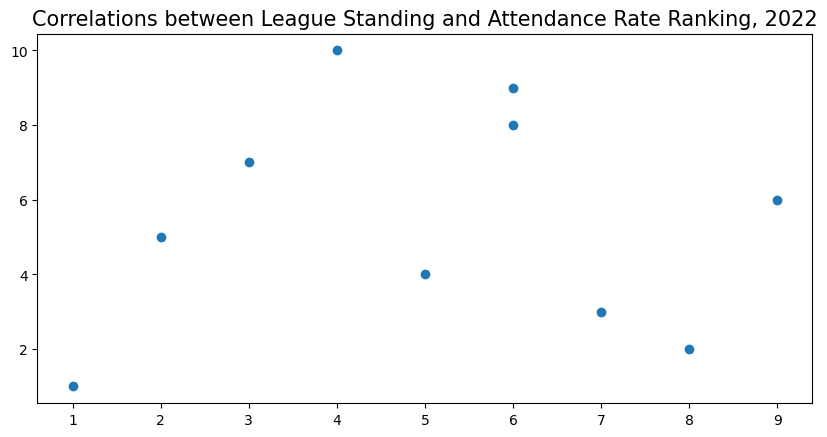

In [20]:
plt.figure().set_figwidth(10)

plt.scatter(club_attendance_merged['attendance_rate_2022_rank'],club_attendance_merged['final_ranking'])
plt.title("Correlations between League Standing and Attendance Rate Ranking, 2022", fontsize = 15)

plt.show()

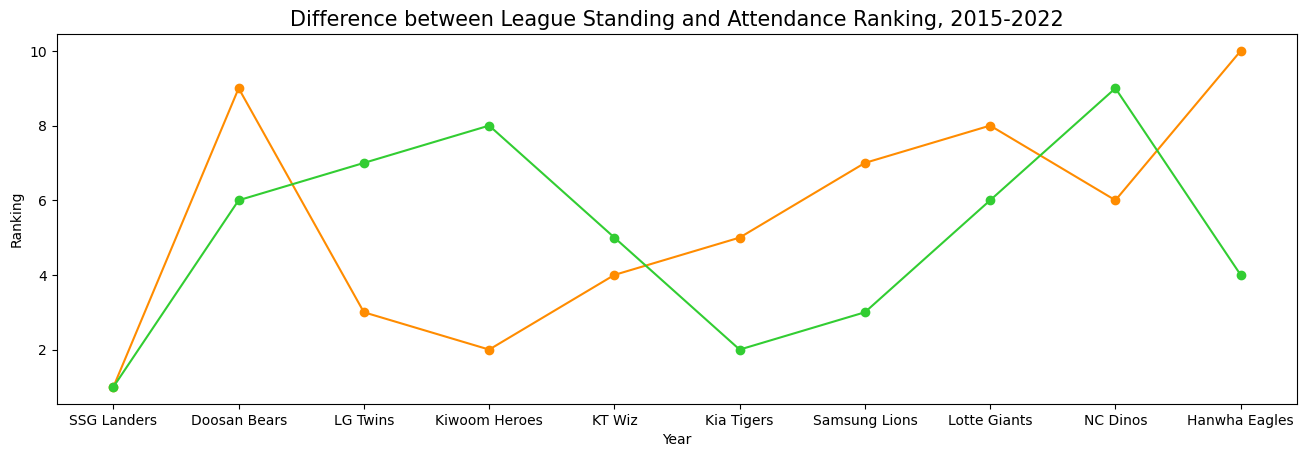

In [21]:
plt.figure().set_figwidth(16)
plt.plot(club_attendance_merged['hometeam'],club_attendance_merged['final_ranking'], color = "darkorange", marker = 'o')
plt.plot(club_attendance_merged['hometeam'],club_attendance_merged['attendance_rate_2022_rank'], color = "limegreen", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Ranking")
plt.title("Difference between League Standing and Attendance Ranking, 2015-2022", fontsize = 15)

# Display
plt.show()

## Correlation between League Standing and Youtube Viewership, 2022

In [22]:
club_youtube_activity = pd.read_csv("club_youtube_activity.csv")
club_ranking = pd.read_csv("club_ranking.csv")

In [23]:
club_youtube_activity

,clubid,clubname,account_platform,account_name,subscribers,total_viewership,video,avg_viewership
0,SL01,SSG Landers,YouTube,SSGLANDERS,123000,80404023,2683,29968
1,DB02,Doosan Bears,YouTube,bearstv.1982,194500,210699027,4583,45974
2,LT03,LG Twins,YouTube,LGTwinsTV,196000,73554961,2115,34778
3,KH04,Kiwoom Heroes,YouTube,heroesbaseballclub,89100,70415874,3262,21587
4,KW05,KT Wiz,YouTube,ktwiztv,79400,34740545,2515,13813
5,KT06,Kia Tigers,YouTube,kiatigerstv,164000,71207881,1800,39560
6,SL07,Samsung Lions,YouTube,lionstv1982,159000,82916890,1643,50467
7,LG08,Lotte Giants,YouTube,giantstv,180000,117873959,4328,27235
8,ND09,NC Dinos,YouTube,ncdinos,71100,42441707,3450,12302
9,HE10,Hanwha Eagles,YouTube,HanwhaEagles_official,191000,114298175,2384,47944


In [24]:
club_youtube_activity['subscribers_rank_score'] = club_youtube_activity['subscribers'].rank(method='dense')
club_youtube_activity['video_rank_score'] = club_youtube_activity['video'].rank(method='dense')
club_youtube_activity['avg_viewership_rank_score'] = club_youtube_activity['avg_viewership'].rank(method='dense')

In [25]:
club_youtube_activity['youtube_activity_score'] = round(((club_youtube_activity['subscribers_rank_score'] + club_youtube_activity['video_rank_score'] + club_youtube_activity['avg_viewership_rank_score']) / 3), 2)
club_youtube_activity['youtube_activity_score_rank'] = club_youtube_activity['youtube_activity_score'].rank(method= 'dense', ascending = False)

In [26]:
club_youtube_activity

,clubid,clubname,account_platform,account_name,subscribers,total_viewership,video,avg_viewership,subscribers_rank_score,video_rank_score,avg_viewership_rank_score,youtube_activity_score,youtube_activity_score_rank
0,SL01,SSG Landers,YouTube,SSGLANDERS,123000,80404023,2683,29968,4.0,6.0,5.0,5.00,6.0
1,DB02,Doosan Bears,YouTube,bearstv.1982,194500,210699027,4583,45974,9.0,10.0,8.0,9.00,1.0
2,LT03,LG Twins,YouTube,LGTwinsTV,196000,73554961,2115,34778,10.0,3.0,6.0,6.33,4.0
3,KH04,Kiwoom Heroes,YouTube,heroesbaseballclub,89100,70415874,3262,21587,3.0,7.0,3.0,4.33,7.0
4,KW05,KT Wiz,YouTube,ktwiztv,79400,34740545,2515,13813,2.0,5.0,2.0,3.00,9.0
5,KT06,Kia Tigers,YouTube,kiatigerstv,164000,71207881,1800,39560,6.0,2.0,7.0,5.00,6.0
6,SL07,Samsung Lions,YouTube,lionstv1982,159000,82916890,1643,50467,5.0,1.0,10.0,5.33,5.0
7,LG08,Lotte Giants,YouTube,giantstv,180000,117873959,4328,27235,7.0,9.0,4.0,6.67,3.0
8,ND09,NC Dinos,YouTube,ncdinos,71100,42441707,3450,12302,1.0,8.0,1.0,3.33,8.0
9,HE10,Hanwha Eagles,YouTube,HanwhaEagles_official,191000,114298175,2384,47944,8.0,4.0,9.0,7.00,2.0


In [27]:
club_ranking_2022 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2022]

In [28]:
club_youtube_activity_merged = pd.merge(club_youtube_activity, club_ranking_2022, on="clubid")
club_youtube_activity_merged

,clubid,clubname,account_platform,account_name,subscribers,total_viewership,video,avg_viewership,subscribers_rank_score,video_rank_score,avg_viewership_rank_score,youtube_activity_score,youtube_activity_score_rank,final_ranking
0,SL01,SSG Landers,YouTube,SSGLANDERS,123000,80404023,2683,29968,4.0,6.0,5.0,5.00,6.0,1
1,DB02,Doosan Bears,YouTube,bearstv.1982,194500,210699027,4583,45974,9.0,10.0,8.0,9.00,1.0,9
2,LT03,LG Twins,YouTube,LGTwinsTV,196000,73554961,2115,34778,10.0,3.0,6.0,6.33,4.0,3
3,KH04,Kiwoom Heroes,YouTube,heroesbaseballclub,89100,70415874,3262,21587,3.0,7.0,3.0,4.33,7.0,2
4,KW05,KT Wiz,YouTube,ktwiztv,79400,34740545,2515,13813,2.0,5.0,2.0,3.00,9.0,4
5,KT06,Kia Tigers,YouTube,kiatigerstv,164000,71207881,1800,39560,6.0,2.0,7.0,5.00,6.0,5
6,SL07,Samsung Lions,YouTube,lionstv1982,159000,82916890,1643,50467,5.0,1.0,10.0,5.33,5.0,7
7,LG08,Lotte Giants,YouTube,giantstv,180000,117873959,4328,27235,7.0,9.0,4.0,6.67,3.0,8
8,ND09,NC Dinos,YouTube,ncdinos,71100,42441707,3450,12302,1.0,8.0,1.0,3.33,8.0,6
9,HE10,Hanwha Eagles,YouTube,HanwhaEagles_official,191000,114298175,2384,47944,8.0,4.0,9.0,7.00,2.0,10


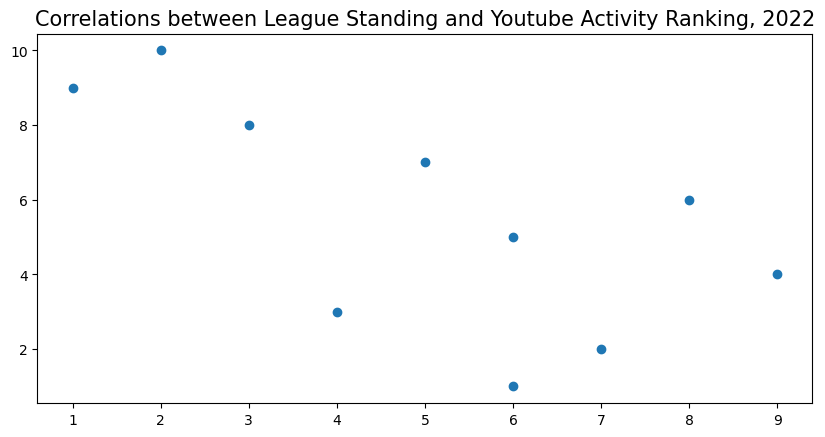

In [29]:
plt.figure().set_figwidth(10)

plt.scatter(club_youtube_activity_merged['youtube_activity_score_rank'],club_youtube_activity_merged['final_ranking'])
plt.title("Correlations between League Standing and Youtube Activity Ranking, 2022", fontsize = 15)

plt.show()

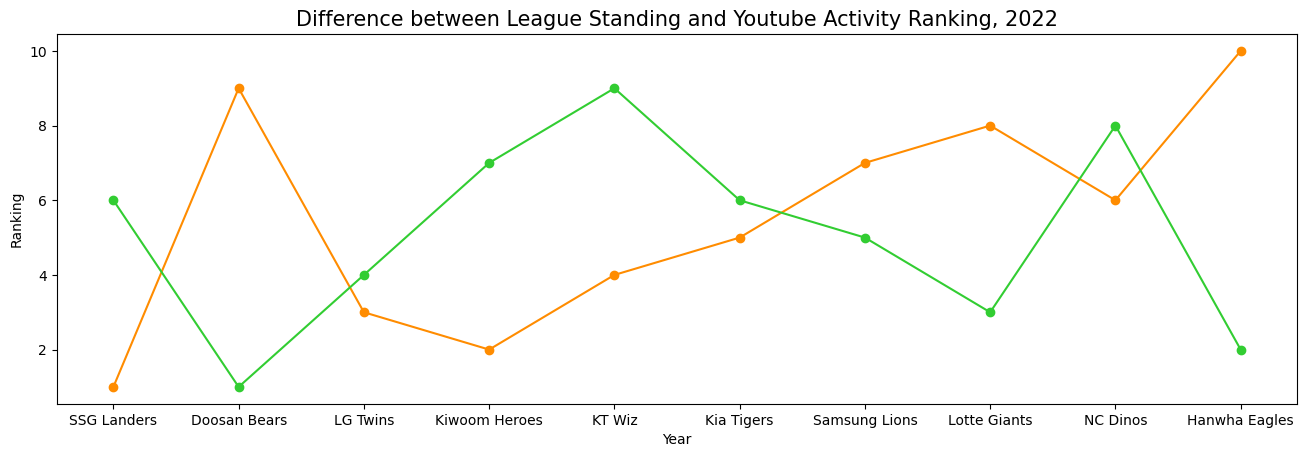

In [30]:
plt.figure().set_figwidth(16)
plt.plot(club_youtube_activity_merged['clubname'],club_youtube_activity_merged['final_ranking'], color = "darkorange", marker = 'o')
plt.plot(club_youtube_activity_merged['clubname'],club_youtube_activity_merged['youtube_activity_score_rank'], color = "limegreen", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Ranking")
plt.title("Difference between League Standing and Youtube Activity Ranking, 2022", fontsize = 15)

# Display
plt.show()

## Correlation between League Standing and Social Engagement, 2022

In [31]:
club_social_activity = pd.read_csv("club_social_activity.csv")
club_ranking = pd.read_csv("club_ranking.csv")

In [32]:
club_instagram_activity = club_social_activity.loc[club_social_activity['account_platform'] == 'Instagram']

In [33]:
club_instagram_activity['followers_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Instagram']['followers'].rank(method='dense')
club_instagram_activity['engagement_rate_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Instagram']['engagement_rate'].rank(method='dense')
club_instagram_activity['post_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Instagram']['posts'].rank(method='dense')

/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/743367094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_instagram_activity['followers_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Instagram']['followers'].rank(method='dense')
/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/743367094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_instagram_activity['engagement_rate_score'] = club_social_activity.loc[club_social_activity[

In [34]:
club_instagram_activity['instagram_activity_score'] = round(((club_instagram_activity['followers_score'] + club_instagram_activity['engagement_rate_score'] + club_instagram_activity['post_score']) / 3), 2)

/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/2142297810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_instagram_activity['instagram_activity_score'] = round(((club_instagram_activity['followers_score'] + club_instagram_activity['engagement_rate_score'] + club_instagram_activity['post_score']) / 3), 2)


In [35]:
club_instagram_activity 

,clubid,clubname,account_platform,account_name,followers,engagement_rate,posts,followers_score,engagement_rate_score,post_score,instagram_activity_score
0,SL01,SSG Landers,Instagram,ssglanders.incheon,94700,11.05,1803,4.0,9.0,1.0,4.67
2,DB02,Doosan Bears,Instagram,doosanbears.1982,110000,4.46,5548,6.0,2.0,10.0,6.00
4,LT03,LG Twins,Instagram,lgtwinsbaseballclub,134000,4.19,4721,8.0,1.0,8.0,5.67
5,KH04,Kiwoom Heroes,Instagram,heroesbaseballclub,67600,7.59,3523,3.0,5.0,5.0,4.33
6,KW05,KT Wiz,Instagram,ktwiz.pr,61900,4.47,5280,2.0,3.0,9.0,4.67
7,KT06,Kia Tigers,Instagram,always_kia_tigers,139000,8.80,3926,9.0,6.0,6.0,7.00
9,SL07,Samsung Lions,Instagram,samsunglions_baseballclub,127000,7.22,4485,7.0,4.0,7.0,6.00
11,LG08,Lotte Giants,Instagram,busanlottegiants,165000,9.19,3133,10.0,7.0,4.0,7.00
12,ND09,NC Dinos,Instagram,ncdinos2011,58500,11.23,2283,1.0,10.0,2.0,4.33
14,HE10,Hanwha Eagles,Instagram,hanwhaeagles_soori,106000,10.16,2522,5.0,8.0,3.0,5.33


In [36]:
club_twitter_activity = club_social_activity.loc[club_social_activity['account_platform'] == 'Twitter']

In [37]:
club_twitter_activity['followers_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Twitter']['followers'].rank(method='dense')
club_twitter_activity['engagement_rate_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Twitter']['engagement_rate'].rank(method='dense')
club_twitter_activity['post_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Twitter']['posts'].rank(method='dense')

/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/2978162323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_twitter_activity['followers_score'] = club_social_activity.loc[club_social_activity['account_platform'] == 'Twitter']['followers'].rank(method='dense')
/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/2978162323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_twitter_activity['engagement_rate_score'] = club_social_activity.loc[club_social_activity['acc

In [38]:
club_twitter_activity['twitter_activity_score'] = round(((club_twitter_activity['followers_score'] + club_twitter_activity['engagement_rate_score'] + club_twitter_activity['post_score']) / 3), 2)

/var/folders/h8/fct7ddbn3s556d1xr88tsg9c0000gn/T/ipykernel_79519/661949233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  club_twitter_activity['twitter_activity_score'] = round(((club_twitter_activity['followers_score'] + club_twitter_activity['engagement_rate_score'] + club_twitter_activity['post_score']) / 3), 2)


In [39]:
club_twitter_activity

,clubid,clubname,account_platform,account_name,followers,engagement_rate,posts,followers_score,engagement_rate_score,post_score,twitter_activity_score
1,SL01,SSG Landers,Twitter,Wyverns_Story,124700,0.0009,29400,2.0,1.0,5.0,2.67
3,DB02,Doosan Bears,Twitter,doosanbears1982,217500,0.0300,13900,4.0,5.0,3.0,4.00
8,KT06,Kia Tigers,Twitter,Kiatigers,274900,0.1300,30600,6.0,6.0,6.0,6.00
10,SL07,Samsung Lions,Twitter,twittlions,220700,0.0070,6286,5.0,2.0,2.0,3.00
13,ND09,NC Dinos,Twitter,NCdinos_fan,183600,0.0120,16900,3.0,3.0,4.0,3.33
15,HE10,Hanwha Eagles,Twitter,hoodi_thespace,9756,0.0130,1836,1.0,4.0,1.0,2.00


In [40]:
club_social_merged = pd.merge(club_instagram_activity, club_twitter_activity, on = ['clubid','clubname'], how = 'outer')
club_social_score = club_social_merged[['clubid','clubname','instagram_activity_score','twitter_activity_score']]

In [41]:
club_social_score = club_social_score.fillna(0)

In [42]:
club_social_score['sum_score'] = club_social_score['instagram_activity_score'] + club_social_score['twitter_activity_score']
club_social_score['social_ranking'] = club_social_score['sum_score'].rank(method='dense', ascending = False)
club_social_score

,clubid,clubname,instagram_activity_score,twitter_activity_score,sum_score,social_ranking
0,SL01,SSG Landers,4.67,2.67,7.34,5.0
1,DB02,Doosan Bears,6.00,4.00,10.00,2.0
2,LT03,LG Twins,5.67,0.00,5.67,8.0
3,KH04,Kiwoom Heroes,4.33,0.00,4.33,10.0
4,KW05,KT Wiz,4.67,0.00,4.67,9.0
5,KT06,Kia Tigers,7.00,6.00,13.00,1.0
6,SL07,Samsung Lions,6.00,3.00,9.00,3.0
7,LG08,Lotte Giants,7.00,0.00,7.00,7.0
8,ND09,NC Dinos,4.33,3.33,7.66,4.0
9,HE10,Hanwha Eagles,5.33,2.00,7.33,6.0


In [43]:
club_ranking_2022 = club_ranking[['clubid','final_ranking']].loc[club_ranking['season'] == 2022]

In [44]:
club_social_score_merged = pd.merge(club_social_score, club_ranking_2022, on = "clubid")
club_social_score_merged

,clubid,clubname,instagram_activity_score,twitter_activity_score,sum_score,social_ranking,final_ranking
0,SL01,SSG Landers,4.67,2.67,7.34,5.0,1
1,DB02,Doosan Bears,6.00,4.00,10.00,2.0,9
2,LT03,LG Twins,5.67,0.00,5.67,8.0,3
3,KH04,Kiwoom Heroes,4.33,0.00,4.33,10.0,2
4,KW05,KT Wiz,4.67,0.00,4.67,9.0,4
5,KT06,Kia Tigers,7.00,6.00,13.00,1.0,5
6,SL07,Samsung Lions,6.00,3.00,9.00,3.0,7
7,LG08,Lotte Giants,7.00,0.00,7.00,7.0,8
8,ND09,NC Dinos,4.33,3.33,7.66,4.0,6
9,HE10,Hanwha Eagles,5.33,2.00,7.33,6.0,10


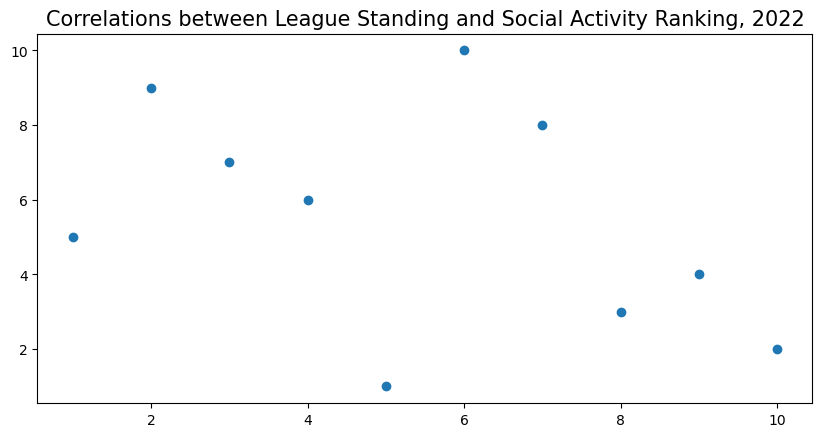

In [45]:
plt.figure().set_figwidth(10)

plt.scatter(club_social_score_merged['social_ranking'],club_social_score_merged['final_ranking'])
plt.title("Correlations between League Standing and Social Activity Ranking, 2022", fontsize = 15)

plt.show()

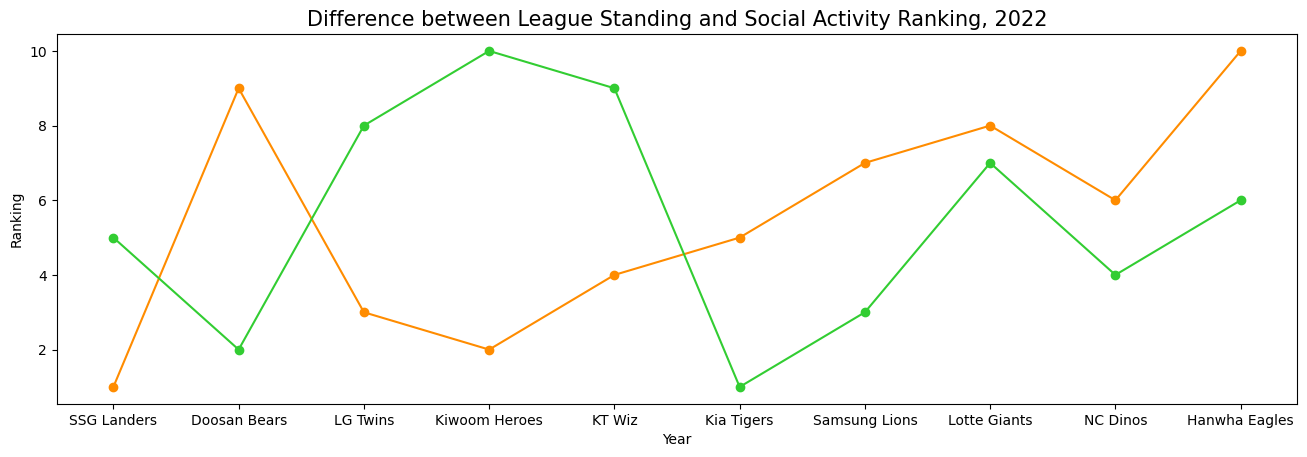

In [46]:
plt.figure().set_figwidth(16)
plt.plot(club_social_score_merged['clubname'],club_social_score_merged['final_ranking'], color = "darkorange", marker = 'o')
plt.plot(club_social_score_merged['clubname'],club_social_score_merged['social_ranking'], color = "limegreen", marker = 'o')

# Labelling 

plt.xlabel("Year")
plt.ylabel("Ranking")
plt.title("Difference between League Standing and Social Activity Ranking, 2022", fontsize = 15)

# Display
plt.show()

## Correlation between Attendance Ranking and Social Activity Ranking, 2022

In [47]:
attend_social_merged = pd.merge(club_attendance_merged,club_social_score_merged, on = "final_ranking")[['hometeam', 'hometeam_id','attendance_rate_2022_rank','social_ranking']]
attend_social_merged

,hometeam,hometeam_id,attendance_rate_2022_rank,social_ranking
0,SSG Landers,SL01,1.0,5.0
1,Doosan Bears,DB02,6.0,2.0
2,LG Twins,LT03,7.0,8.0
3,Kiwoom Heroes,KH04,8.0,10.0
4,KT Wiz,KW05,5.0,9.0
5,Kia Tigers,KT06,2.0,1.0
6,Samsung Lions,SL07,3.0,3.0
7,Lotte Giants,LG08,6.0,7.0
8,NC Dinos,ND09,9.0,4.0
9,Hanwha Eagles,HE10,4.0,6.0


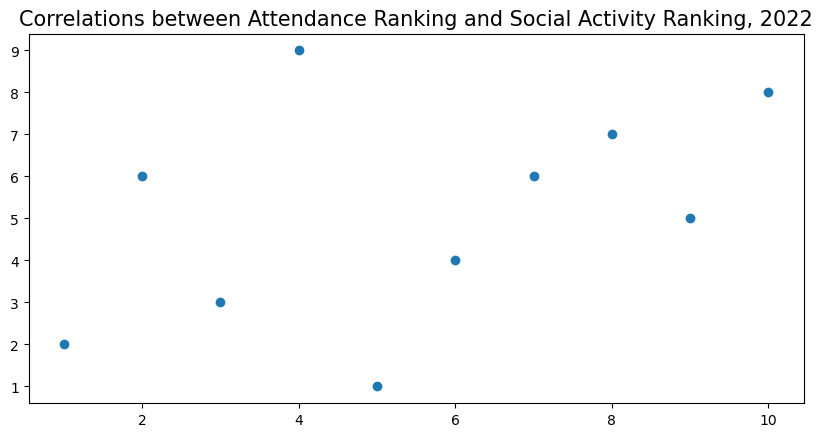

In [48]:
plt.figure().set_figwidth(10)

plt.scatter(attend_social_merged['social_ranking'],attend_social_merged['attendance_rate_2022_rank'])
plt.title("Correlations between Attendance Ranking and Social Activity Ranking, 2022", fontsize = 15)

plt.show()

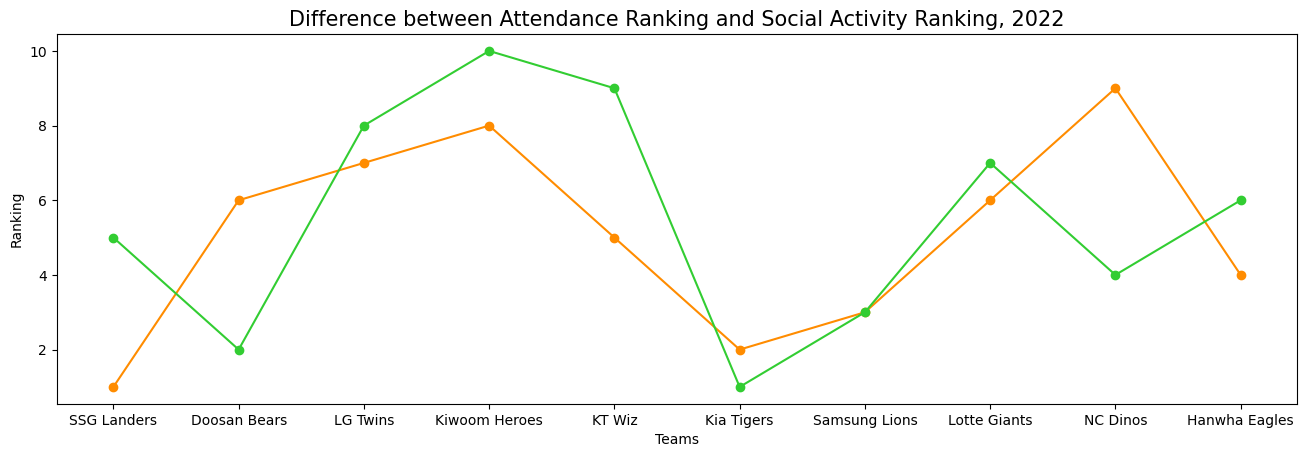

In [49]:
plt.figure().set_figwidth(16)
plt.plot(attend_social_merged['hometeam'],attend_social_merged['attendance_rate_2022_rank'], color = "darkorange", marker = 'o')
plt.plot(attend_social_merged['hometeam'],attend_social_merged['social_ranking'], color = "limegreen", marker = 'o')

# Labelling 

plt.xlabel("Teams")
plt.ylabel("Ranking")
plt.title("Difference between Attendance Ranking and Social Activity Ranking, 2022", fontsize = 15)

# Display
plt.show()